<a href="https://colab.research.google.com/github/bibekebib/Tensorflow-basics/blob/main/Computer_Vision_with_Tensorflow_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os


In [2]:
physical_device = tf.config.list_physical_devices('GPU')
if len(physical_device) > 0:
  tf.config.experimental.set_memory_growth(physical_device[0], True)

print(tf.__version__)

2.7.0


In [3]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


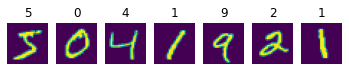

In [4]:
fig,ax = plt.subplots(1,7)
for i in range(7):
  ax[i].imshow(X_train[i])
  ax[i].set_title(Y_train[i])
  ax[i].axis('off')

In [5]:
X_train  = X_train.astype(np.float32)/255.0
X_test = X_test.astype(np.float32) / 255.0


# Training a dense neural network

In [6]:
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=(28,28)),
                                keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
print('Digit to be predicted: ',Y_train[15])
model(np.expand_dims(X_train[0],0))

Digit to be predicted:  7


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.05069043, 0.13875236, 0.10125294, 0.09453603, 0.05950064,
        0.1369827 , 0.10136914, 0.12247037, 0.09410646, 0.10033897]],
      dtype=float32)>

In [8]:
model.compile(optimizer='sgd', loss='categorical_crossentropy')

In [9]:
Y_train[0]

5

In [10]:
y_train_onehot = keras.utils.to_categorical(Y_train)
y_test_onehot = keras.utils.to_categorical(Y_test)

In [11]:
y_train_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
hist = model.fit(X_train, y_train_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7783
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4561
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4031
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3764
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3597


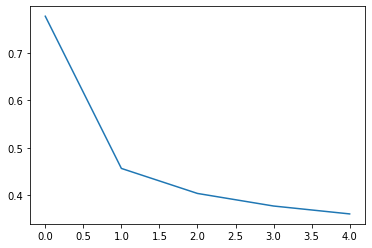

In [13]:

for x in ['loss']:
    plt.plot(hist.history[x])

In [14]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
hist = model.fit(X_train, y_train_onehot, epochs=5, validation_data=(X_test, y_test_onehot))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3479 - acc: 0.9035 - val_loss: 0.3262 - val_acc: 0.9110
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3389 - acc: 0.9054 - val_loss: 0.3191 - val_acc: 0.9122
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3318 - acc: 0.9078 - val_loss: 0.3145 - val_acc: 0.9139
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3259 - acc: 0.9090 - val_loss: 0.3099 - val_acc: 0.9145
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3210 - acc: 0.9105 - val_loss: 0.3063 - val_acc: 0.9153


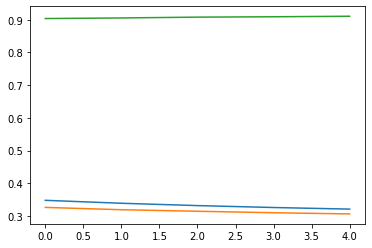

In [15]:
for x in ['loss','val_loss', 'acc']:
    plt.plot(hist.history[x])

In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])
hist = model.fit(X_train, y_train_onehot, epochs=5, validation_data=(X_test, y_test_onehot), validation_batch_size=128)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3168 - acc: 0.9121 - val_loss: 0.3039 - val_acc: 0.9154
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - acc: 0.9133 - val_loss: 0.2997 - val_acc: 0.9169
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3100 - acc: 0.9139 - val_loss: 0.2978 - val_acc: 0.9170
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3071 - acc: 0.9150 - val_loss: 0.2955 - val_acc: 0.9175
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3046 - acc: 0.9156 - val_loss: 0.2933 - val_acc: 0.9177


In [17]:
# from sklearn.preprocessing import normalize
# for x in ['loss','val_loss', 'val_acc']:
#     plt.plot(np.array(hist.history[normalize(x[:,np.newaxis], axis=0)]))


# # normalize(x[:,np.newaxis], axis=0)
# # plt.plot(np.array(hist.history['loss'])/300)
# # plt.plot(np.array(hist.history['val_acc']))

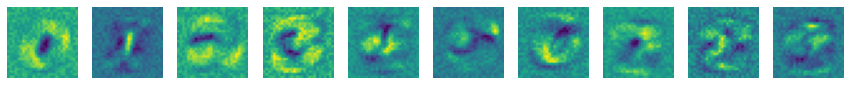

In [18]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

# Multi-layer Network

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100))     # 784 inputs, 100 outputs
model.add(keras.layers.ReLU())         # Activation Function
model.add(keras.layers.Dense(10))      # 100 inputs, 10 outputs

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               78500     
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

In [21]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2738 - acc: 0.9218 - val_loss: 0.1542 - val_acc: 0.9553
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1316 - acc: 0.9620 - val_loss: 0.1121 - val_acc: 0.9674
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0972 - acc: 0.9722 - val_loss: 0.1066 - val_acc: 0.9680
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0802 - acc: 0.9778 - val_loss: 0.0940 - val_acc: 0.9753
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - acc: 0.9810 - val_loss: 0.0933 - val_acc: 0.9753


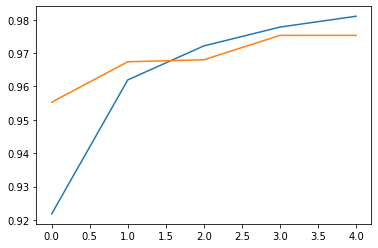

In [22]:
for x in ['acc','val_acc']:
    plt.plot(hist.history[x])

# Convolution Neural Network

In [23]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters = 9, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 9)         234       
                                                                 
 flatten_2 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                51850     
                                                                 
Total params: 52,084
Trainable params: 52,084
Non-trainable params: 0
_________________________________________________________________


In [28]:
x_train_c = np.expand_dims(X_train,3)
x_test_c = np.expand_dims(X_test,3)
hist = model.fit(x_train_c,Y_train,validation_data=(x_test_c,Y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2110 - acc: 0.9390 - val_loss: 0.0918 - val_acc: 0.9725
Epoch 2/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0897 - acc: 0.9746 - val_loss: 0.0789 - val_acc: 0.9763
Epoch 3/3
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0699 - acc: 0.9803 - val_loss: 0.0675 - val_acc: 0.9793


In [30]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 320)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [31]:
hist = model.fit(x_train_c,Y_train,validation_data=(x_test_c,Y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2174 - acc: 0.9363 - val_loss: 0.0737 - val_acc: 0.9781
Epoch 2/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0732 - acc: 0.9780 - val_loss: 0.0489 - val_acc: 0.9851
Epoch 3/3
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0542 - acc: 0.9840 - val_loss: 0.0423 - val_acc: 0.9862


In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170508288/170498071 [==============================] - 2s 0us/step


In [37]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(filters=6, input_shape=(32,32,3), kernel_size=5, strides=1, activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=2, strides=2),
                                 keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=2, strides=2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(120,activation='relu'),
                                 keras.layers.Dense(84, activation='relu'),
                                 keras.layers.Dense(10, activation='softmax')
                                
])
# model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 400)               0         
                                                                 
 dense_14 (Dense)            (None, 120)              

In [38]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [39]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6239 - acc: 0.4051 - val_loss: 1.4154 - val_acc: 0.4725
Epoch 2/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.3577 - acc: 0.5113 - val_loss: 1.3300 - val_acc: 0.5199
Epoch 3/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.2480 - acc: 0.5543 - val_loss: 1.2885 - val_acc: 0.5384
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 1.1750 - acc: 0.5829 - val_loss: 1.2165 - val_acc: 0.5599
Epoch 5/10
1563/1563 [==============================] - 48s 30ms/step - loss: 1.1153 - acc: 0.6061 - val_loss: 1.2454 - val_acc: 0.5638
Epoch 6/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0627 - acc: 0.6250 - val_loss: 1.1659 - val_acc: 0.5834
Epoch 7/10
1563/1563 [==============================] - 49s 32ms/step - loss: 1.0166 - acc: 0.6416 - val_loss: 1.1715 - val_acc: 0.5898
Epoch 8/10
1563/1563 [==========================